## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [2]:
import os
import keras

import warnings
warnings.filterwarnings('ignore')
# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [5]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [7]:


def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [8]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-2
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.9,0.95,1]

In [9]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}
"""
使用迴圈，建立不同 momentum 的模型並訓練
"""
for momentum in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with momentum = %.6f" % (momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "momentum-%s" % str(momentum)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with momentum = 0.900000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.8372 - acc: 0.3452 - val_loss: 1.6527 - val_acc: 0.4103
Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.5983 - acc: 0.4334 - val_loss: 1.5621 - val_acc: 0.4486
Epoch 3/50
50000/50000 [==============================] - 8s 153us/step - loss: 1.5065 - acc: 0.4639 - val_loss: 1.5209 - val_acc: 0.4529
Epoch 4/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.4490 - acc: 0.4868 - val_loss: 1.4921 - val_acc: 0.4697
Epoch 5/50
50000/50000 [==============================] - 9s 172us/step - loss: 1.4095 - acc: 0.4994 - val_loss: 1.4812 - val_acc: 0.4743
Epoch 6/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.3644 - acc: 0.5168 - val_loss: 1.4227 - val_acc: 0.4922
Epoch 7/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.3238 - acc: 0.5317 - val_loss: 1.4536 - 

Epoch 2/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.6907 - acc: 0.4020 - val_loss: 1.6793 - val_acc: 0.4037
Epoch 3/50
50000/50000 [==============================] - 8s 152us/step - loss: 1.7060 - acc: 0.3981 - val_loss: 1.7239 - val_acc: 0.3807
Epoch 4/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.7640 - acc: 0.3584 - val_loss: 1.7909 - val_acc: 0.3502
Epoch 5/50
50000/50000 [==============================] - 8s 155us/step - loss: 1.8197 - acc: 0.3298 - val_loss: 1.8904 - val_acc: 0.3022
Epoch 6/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.9221 - acc: 0.2906 - val_loss: 2.0654 - val_acc: 0.2610
Epoch 7/50
50000/50000 [==============================] - 8s 154us/step - loss: 2.0117 - acc: 0.2472 - val_loss: 2.0672 - val_acc: 0.2192
Epoch 8/50
50000/50000 [==============================] - 8s 152us/step - loss: 2.0526 - acc: 0.2204 - val_loss: 2.0928 - val_acc: 0.2222
Epoch 9/50
50000/50000 [==========

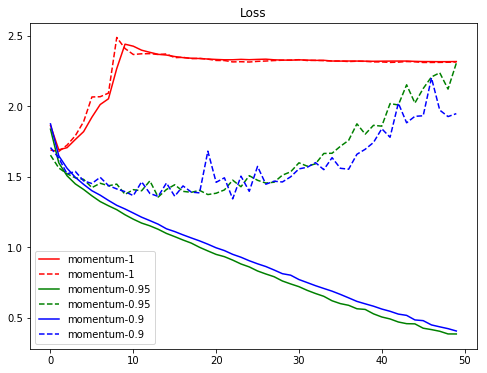

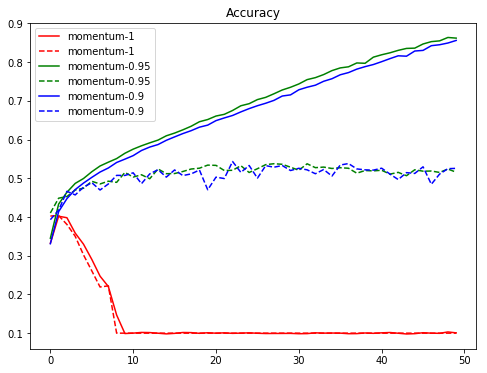

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()